

Lucas Viñals de Luna


# Diseño, Entrenamiento y Test de un Sistema de Redes de Neuronas Artificiales.

Desarrollaremos un modelo de Red Neuronal Artificial capaz de reconocer y clasificar imágenes de ropa en distintas categorías.

Este modelo será diseñado, configurado, entrenado, evaluado y optimizado, con el objetivo de utilizarlo posteriormente para realizar predicciones.

Para ello, crearemos un modelo en Keras utilizando el conjunto de datos Fashion-MNIST.

Fashion-MNIST es un conjunto de datos que contiene imágenes de artículos de Zalando (www.zalando.com), una tienda de moda online alemana especializada en la venta de ropa y calzado. El conjunto de datos incluye 70,000 imágenes en escala de grises, distribuidas en 10 categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución (28 x 28 píxeles):
<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
  </td></tr>
</table>


# Conceptos básicos

####Optimizadores:

Un optimizador es un algoritmo que ajusta los atributos de la red neuronal, como los pesos y la tasa de aprendizaje. Su función es reducir la pérdida general y mejorar la precisión del modelo. Vamos a trabajar con distintos optimizadores para estudiar sus comportamientos y diferencias:

####SGD (Descenso del Gradiente Estocástico):

El término "estocástico" se refiere a la aleatoriedad en la que se basa el algoritmo. En el descenso de gradiente estocástico, en lugar de usar todo el conjunto de datos para cada iteración, se seleccionan aleatoriamente lotes de datos. Esto significa que solo se toman algunas muestras del conjunto de datos en cada iteración. Debido a que no se utiliza el conjunto completo de datos sino lotes, la trayectoria seguida por el algoritmo es más ruidosa en comparación con el descenso de gradiente tradicional. Por lo tanto, el SGD requiere un mayor número de iteraciones para alcanzar los mínimos locales, lo que incrementa el tiempo total de cálculo.

####RMSPROP:

Este optimizador ajusta el tamaño del paso de forma individual para cada peso utilizando el signo del gradiente. En RMSPROP, se comparan los signos de dos gradientes. Si tienen el mismo signo, significa que vamos en la dirección correcta, por lo que aumentamos ligeramente el tamaño del paso. Si los signos son opuestos, disminuimos el tamaño del paso. El tamaño del paso se limita y luego se procede a la actualización del peso.

####ADAM:

El optimizador Adam combina el uso de impulso y tasas de aprendizaje adaptativas para converger más rápido. Los resultados obtenidos con Adam son generalmente mejores que con otros algoritmos de optimización, tiene un tiempo de cálculo más rápido y requiere menos parámetros para ajustar.

####Función de activación:
Esta función determina la salida de una capa según las entradas que recibe.

####RELU (Unidad Lineal Rectificada):

ReLU puede acelerar la velocidad de entrenamiento de las redes neuronales profundas en comparación con las funciones de activación tradicionales, ya que su derivada es 1 para una entrada positiva (establece en cero los valores negativos). Por esta razón, la utilizaremos como función de activación en la primera capa.

####SIGMOID:

La función sigmoide toma un número como entrada y devuelve un valor entre 0 y 1. Se utiliza frecuentemente como función de activación en distintas capas de una red neuronal. Determina si un nodo debe activarse y, por tanto, si debe contribuir a los cálculos de la red.

####SOFTMAX:

Se usa en la capa de salida para predecir una distribución de probabilidad multinomial.







# Importamos librerías y datos

Se importa Keras

In [3]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
GPU Available: []
2.15.0


Cargamos los datos que se van a estar utilizando. Se debe diferenciar entre los datos de entrenamiento y de prueba. Es importante saber que sólo se deben utilizar los datos de prueba para las pruebas, no podemos dejar que esos datos contaminen la red neuronal, esta solo debe aprender con los datos de entrenamiento.

In [4]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# Análisis de datos

Comprobamos las dimensiones de los datos proporcionados:

In [5]:
print(train_images.shape)

(60000, 28, 28)


Siguiendo las instrucciones del ejercicio, usaremos 60.000 imágenes para el entrenamiento, de 28*28 píxeles. Más adelante deberemos cambiar las dimensiones de las imágenes, para así poderlas entrar correctamente a la primera capa de la red neuronal.

Comprobamos la longitud de las etiquetas para comprobar que están todas, tanto en las fotos de entrenamiento como en las del test:

In [6]:
len(train_labels)


60000

In [7]:
len(test_labels)

10000

Es correcto, ya que para cada imagen, se tiene asociado una etiqueta como se deseaba.

A continuación, probamos a ver cómo se vería representada la imagen número 1001:

In [8]:
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[1000]))

[[  0   0   0   0   0   0   0   0   0   0   0  97  84  97 110 108  87  97   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  19 255 199 183 142 161 200 213  32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  72 174 173 158 131 132 176 176  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 142 180 163 120 180 126 139 168 122   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 156 180 162 171 170 183 163 169 144   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 159 177 163 174 166 173 170 163 148   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 160 182 160 168 175 167 157 168 139   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 143 185 161 171 184 176 160 175 131   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 143 188 155 172 182 180 161 182 127   

Se puede asemejar a un pantalón, y efectivamente, comprobando con la etiqueta que se proporciona, se está representando de manera correcta.

In [9]:
train_labels[1000]


1

Probamos otra manera de representar la imagen.

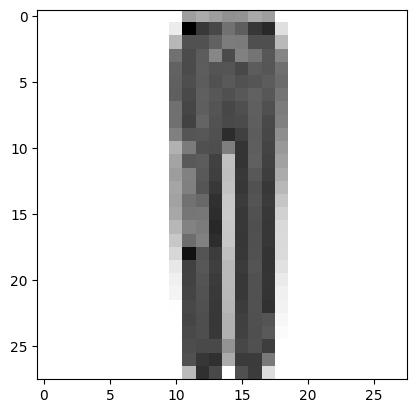

In [10]:
import matplotlib.pyplot as plt
digit = train_images[1000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Analizamos cómo están distribuidos los datos.

A la hora de dividirlos en aquellos que usaremos para entrenar la red neuronal, idealmente querríamos una buena distribución de las imágenes de forma que haya un porcentaje similar de cada tipo de prenda, para ambos lotes.

Si no estuviesen distribuidas de forma aceptable, no podríamos separar los datos de forma aleatoria.

In [13]:
tipo1 = 0
tipo2 = 0
tipo3 = 0
tipo4 = 0
tipo5 = 0
tipo6 = 0
tipo7 = 0
tipo8 = 0
tipo9 = 0
tipo10 = 0
for i in train_labels:
  if i == 0:
    tipo1 = tipo1+1
  elif i == 1:
    tipo2 = tipo2+1
  elif i == 2:
    tipo3 = tipo3+1
  elif i == 3:
    tipo4 = tipo4+1
  elif i == 4:
    tipo5 = tipo5+1
  elif i == 5:
    tipo6 = tipo6+1
  elif i == 6:
    tipo7 = tipo7+1
  elif i == 7:
    tipo8 = tipo8+1
  elif i == 8:
    tipo9 = tipo9+1
  elif i == 9:
    tipo10 = tipo10+1
print(tipo1, tipo2, tipo3, tipo4, tipo5, tipo6, tipo7, tipo8, tipo9, tipo10)

6000 6000 6000 6000 6000 6000 6000 6000 6000 6000


Tenemos 6.000 imágenes de cada tipo de ropa, en los datos de entrenamiento, un 10% de cada etiqueta, por lo que podemos decir que están bien distribuidos y podemos proceder a crear cada una de las redes neuronales que se necesitarán.

# Preparación de datos


Normalizamos las imágenes y las visualizamos para verificar que la normalización se ha realizado correctamente. Primero, cambiamos la dimensión de las imágenes, transformándolas de matrices a vectores. Una vez modificada la dimensión de las imágenes, es necesario normalizar cada uno de los elementos de los vectores que representan los datos de cada imagen de entrenamiento.

In [14]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[10]))

60000
(60000, 784)
[[0.   0.   0.   0.   0.   0.   0.   0.04 0.56 0.78 0.42 0.   0.   0.   0.   0.   0.   0.   0.33 0.73 0.44 0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.6  0.84 0.85 0.76 0.93 0.85 0.73 0.58 0.53 0.6  0.83 0.85 0.91 0.8  0.85 0.74 0.13 0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.26 0.73 0.65 0.71 0.71 0.75 0.83 0.87 0.77 0.57 0.78 0.81 0.75 0.66 0.75 0.67 0.74 0.69 0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.53 0.6  0.63 0.69 0.71 0.67 0.73 0.73 0.75 0.74 0.75 0.73 0.68 0.76 0.73 0.68 0.63 0.69 0.23 0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.63 0.58 0.63 0.67 0.7  0.69 0.71 0.66 0.68 0.68 0.67 0.73 0.72 0.73 0.67 0.67 0.64 0.68 0.47 0.   0.   0.   0.
  0.   0.   0.   0.   0.01 0.69 0.57 0.57 0.66 0.7  0.71 0.73 0.71 0.72 0.7  0.7  0.73 0.75 0.76 0.75 0.71 0.67 0.67 0.62 0.   0.   0.   0.
  0.   0.   0.   0.   0.14 0.69 0.61 0.55 0.59 0.67 0.75 0.73 0.73 0.73 0.73 0.73 0.71 0.75 0.76 0.74 0.71 0.63 0.63 0.73 0.   0.   0.   0.
 

Gracias al término one hot enconding, cambiamos el formato de las etiquetas. Lo que encontramos ahora es un vector de 10 bits, con todos los valores en 0, excepto un bit cuyo valor sea 1 cuya posición nos indicará a qué clase de ropa pertenece la imagen.


In [15]:
def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Datos de entrenamiento vectorizados
one_hot_train_labels = to_one_hot(train_labels)
# Datos de test vectorizados
one_hot_test_labels = to_one_hot(test_labels)
print(one_hot_test_labels)


[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
#from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical


one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
print(one_hot_test_labels[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


# Casos

## Caso 1

Procedemos a crear el primer modelo.

 Primero, determinamos que será un modelo secuencial, es decir, las capas se procesarán una tras otra sin retrocesos. A continuación, añadimos las capas especificadas, las cuales serán densas, lo que significa que cada neurona de una capa se conectará con todas las neuronas de la capa siguiente.

 La primera capa será de 10 neuronas y utilizará la función de activación 'ReLU'.

 En la última capa, dado que se trata de una red neuronal de clasificación multiclase, añadimos una capa con 10 neuronas, correspondiente al número de clases disponibles. Utilizaremos la función de activación 'softmax' en esta capa para obtener valores de probabilidad que indican la pertenencia de la imagen introducida a cada una de las clases posibles.

In [20]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Procedemos a observar un diagrama que represente las capas con las que se está trabajando. En este caso, en la primera capa le entra un vector de tamaño 784

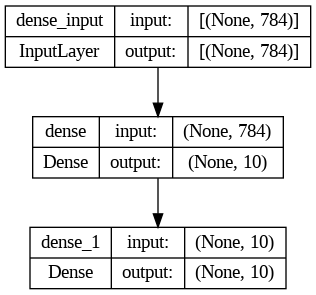

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network, "my_first_model.png", show_shapes=True)

A continuación, marcamos el optimizador que utilizaremos, en este caso basado en el descenso estocástico del gradiente, la función de pérdida que será categórica debido a que estamos clasificando en categorías y la métrica a utilizar que será la precisión.

In [22]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Procedemos a entrenar la red con los datos de entrenamiento y a su vez queremos ver la pérdida de validación, en la cual usamos los datos de entrenamiento y la precisión de esos datos de validación.
En este caso el número de épocas será 5 y el batch_size utilizado 128, es decir actualizará los pesos de la red neuronal cada vez que pase un lote de 128 imágenes de entrenamiento por la red neuronal

In [23]:
# Dividimos los datos de entrenamiento entre detos de validación y datos de entrenamiento y de igual forma con las etiquetas
x_val = train_images[:10000]
partial_x_train = train_images[10000:]
y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [24]:
history = network.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
391/391 [==============================] - 2s 4ms/step - loss: 1.5668 - accuracy: 0.4864 - val_loss: 1.0172 - val_accuracy: 0.7063
Epoch 2/5
391/391 [==============================] - 1s 3ms/step - loss: 0.8484 - accuracy: 0.7374 - val_loss: 0.7500 - val_accuracy: 0.7557
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 0.7091 - accuracy: 0.7663 - val_loss: 0.6754 - val_accuracy: 0.7775
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 0.6503 - accuracy: 0.7837 - val_loss: 0.6317 - val_accuracy: 0.7905
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 0.6125 - accuracy: 0.7960 - val_loss: 0.6010 - val_accuracy: 0.8003


Por último, realizamos una gráfica en la que enfrentamos el número de épocas con los datos de pérdida tanto de validación, como de entrenamiento, con el fin de saber el número adecuado de épocas para no sobre entrenar el modelo.

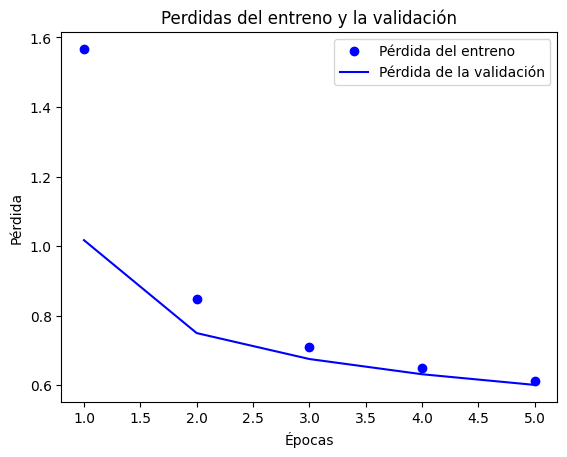

In [25]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

Para el resto de modelos realizaremos el mismo procedimiento seguido en este caso para la creación de la red neuronal.

## Caso 2

In [26]:
network2 = models.Sequential()
network2.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network2.add(layers.Dense(10, activation='softmax'))
network2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


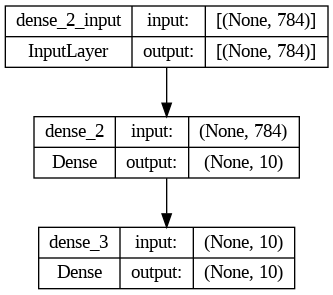

In [27]:
keras.utils.plot_model(network2, "my_first_model.png", show_shapes=True)

In [28]:
network2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [29]:
history = network2.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
391/391 [==============================] - 3s 5ms/step - loss: 0.9001 - accuracy: 0.6966 - val_loss: 0.5861 - val_accuracy: 0.8037
Epoch 2/5
391/391 [==============================] - 3s 7ms/step - loss: 0.5380 - accuracy: 0.8155 - val_loss: 0.5091 - val_accuracy: 0.8276
Epoch 3/5
391/391 [==============================] - 2s 5ms/step - loss: 0.4884 - accuracy: 0.8337 - val_loss: 0.4778 - val_accuracy: 0.8402
Epoch 4/5
391/391 [==============================] - 2s 4ms/step - loss: 0.4634 - accuracy: 0.8414 - val_loss: 0.4729 - val_accuracy: 0.8370
Epoch 5/5
391/391 [==============================] - 2s 4ms/step - loss: 0.4471 - accuracy: 0.8452 - val_loss: 0.4741 - val_accuracy: 0.8357


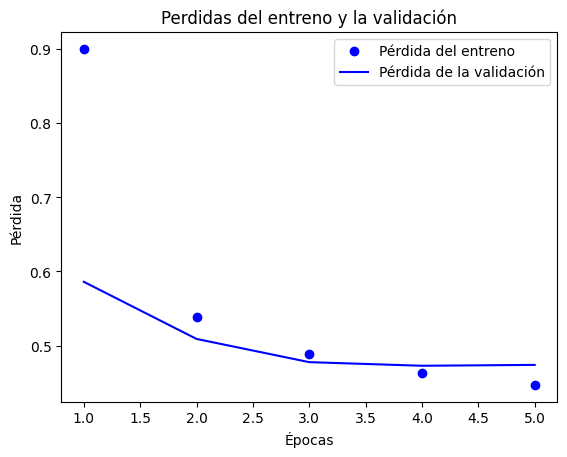

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

## Caso 2.2

In [31]:
network22 = models.Sequential()
network22.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network22.add(layers.Dense(10, activation='softmax'))
network22.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


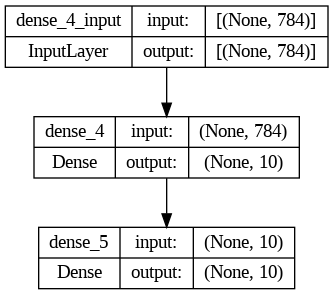

In [32]:
keras.utils.plot_model(network22, "my_first_model.png", show_shapes=True)

In [33]:
network22.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

En este modelo vamos a implementar una diferencia respecto a los modelos anteriores que se basará en el número de épocas, en este caso, será 25 y nos servirá para hacer una comparativa con el caso del modelo 2.

In [34]:
history = network22.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/25
391/391 [==============================] - 2s 5ms/step - loss: 0.9461 - accuracy: 0.6962 - val_loss: 0.5744 - val_accuracy: 0.8069
Epoch 2/25
391/391 [==============================] - 1s 3ms/step - loss: 0.5231 - accuracy: 0.8218 - val_loss: 0.4994 - val_accuracy: 0.8307
Epoch 3/25
391/391 [==============================] - 2s 4ms/step - loss: 0.4753 - accuracy: 0.8369 - val_loss: 0.4729 - val_accuracy: 0.8390
Epoch 4/25
391/391 [==============================] - 3s 8ms/step - loss: 0.4522 - accuracy: 0.8434 - val_loss: 0.4568 - val_accuracy: 0.8390
Epoch 5/25
391/391 [==============================] - 2s 4ms/step - loss: 0.4371 - accuracy: 0.8489 - val_loss: 0.4550 - val_accuracy: 0.8393
Epoch 6/25
391/391 [==============================] - 1s 4ms/step - loss: 0.4250 - accuracy: 0.8533 - val_loss: 0.4307 - val_accuracy: 0.8510
Epoch 7/25
391/391 [==============================] - 1s 4ms/step - loss: 0.4177 - accuracy: 0.8545 - val_loss: 0.4349 - val_accuracy: 0.8501
Epoch 

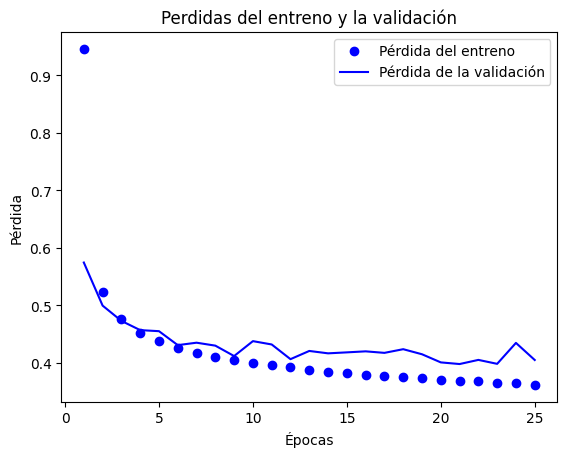

In [35]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

###Comparación modelos 2 y 2.2
En este caso podemos realizar una comparación entre los modelos 2 y 2.2 donde se puede observar claramente un ejemplo de sobre entrenamiento en el caso 2.2, donde se ve que a partir de la época 10 la pérdida de validación se dispara respecto a la pérdida de entrenamiento, por tanto, el modelo 2.2 es peor que el modelo 2 debido a que la red se ha sobre entrenado.


## Caso 3

In [36]:
network3 = models.Sequential()
network3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network3.add(layers.Dense(10, activation='softmax'))
network3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


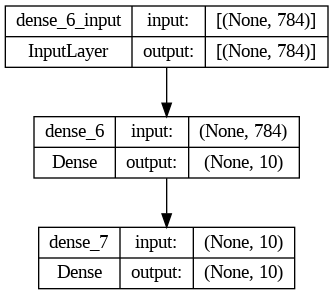

In [37]:
keras.utils.plot_model(network3, "my_first_model.png", show_shapes=True)

In [38]:
network3.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [39]:
history = network3.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
391/391 [==============================] - 2s 4ms/step - loss: 2.0878 - accuracy: 0.2392 - val_loss: 1.9323 - val_accuracy: 0.3549
Epoch 2/5
391/391 [==============================] - 1s 4ms/step - loss: 1.8394 - accuracy: 0.4235 - val_loss: 1.7536 - val_accuracy: 0.4676
Epoch 3/5
391/391 [==============================] - 2s 5ms/step - loss: 1.6930 - accuracy: 0.5020 - val_loss: 1.6311 - val_accuracy: 0.5219
Epoch 4/5
391/391 [==============================] - 3s 6ms/step - loss: 1.5853 - accuracy: 0.5432 - val_loss: 1.5346 - val_accuracy: 0.5524
Epoch 5/5
391/391 [==============================] - 2s 4ms/step - loss: 1.4965 - accuracy: 0.5871 - val_loss: 1.4522 - val_accuracy: 0.6223


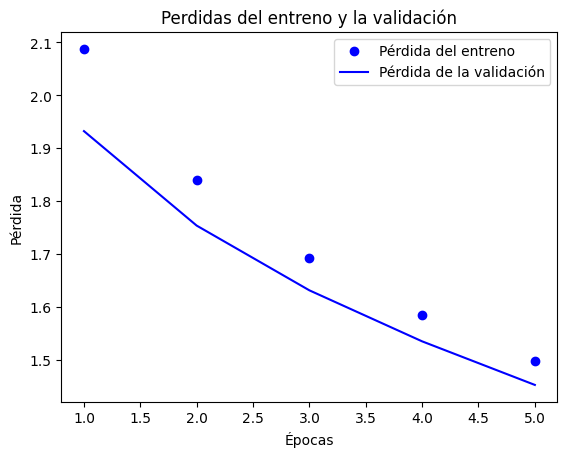

In [40]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

##Caso 3.2

**Keras Flatten** aplana la entrada sin afectar el tamaño del lote. Se utiliza cuando se trabaja con tensores multidimensionales, como los conjuntos de datos de imágenes y los conjuntos de datos de múltiples capas, para no perder ninguna información.

El método **layer.flatten()** se emplea para convertir una matriz multidimensional en una matriz plana unidimensional.

Las dimensiones del lote no se incluyen como parte de keras.layer.flatten, ya que el propósito es recibir la entrada como multidimensional y producir una salida como una matriz unidimensional.

Observamos como implementarla en el caso 3:

Este modelo es un poco diferente a los demás. En primer lugar, se utilizará la función **'keras.layers.Flatten'**, que permite introducir las imágenes en la red neuronal sin necesidad de cambiar sus dimensiones previamente, ya que será esta primera capa la encargada de ajustar la dimensión de los datos de entrada para adecuarlos al modelo.

Otra diferencia es que no será necesario normalizar ni las imágenes ni las etiquetas, ya que utilizaremos una función de pérdida llamada **'sparse_categorical_crossentropy'**, la cual trabaja con los datos originales y no con datos normalizados. Esto también se debe al uso de un nuevo optimizador, que en este caso es 'Adam'.


Este modelo es un poco diferente al resto de modelos, en primer lugar porque se va a utilizar la función **'keras.layes.flatten'** que permite introducir las imágenes en la red neuronal sin necesidad de cambiar las dimensiones de las imágenes ya que será es primera capa la que se encargará de cambiar la dimensión de los datos de entrada para adecuarlos al modelo.

Además, otra diferencia es que no debemos normalizar ni las imágenes ni las etiquetas, ya que utilizaremos una función de pérdida que es **'sparse_categorigal_crosentropy'** que trabaja con los datos iniciales y no con los datos normalizados. Esto también se debe al uso de un nuevo optimizador que es 'Adam'.

In [41]:
network32= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
network32.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


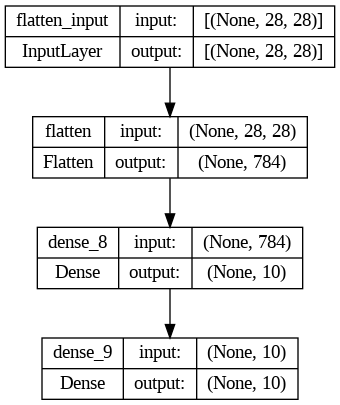

In [42]:
keras.utils.plot_model(network32, "my_first_model.png", show_shapes=True)

In [43]:
network32.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Volvemos a importar los datos ya que los queremos en su forma inicial

In [44]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [45]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [46]:
history = network32.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
391/391 [==============================] - 2s 4ms/step - loss: 3.3710 - accuracy: 0.1378 - val_loss: 2.0749 - val_accuracy: 0.2206
Epoch 2/5
391/391 [==============================] - 1s 3ms/step - loss: 1.9184 - accuracy: 0.2839 - val_loss: 1.8226 - val_accuracy: 0.3053
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 1.7039 - accuracy: 0.3464 - val_loss: 1.5810 - val_accuracy: 0.3814
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 1.4743 - accuracy: 0.4145 - val_loss: 1.4751 - val_accuracy: 0.3801
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 1.3965 - accuracy: 0.4337 - val_loss: 1.4175 - val_accuracy: 0.4789


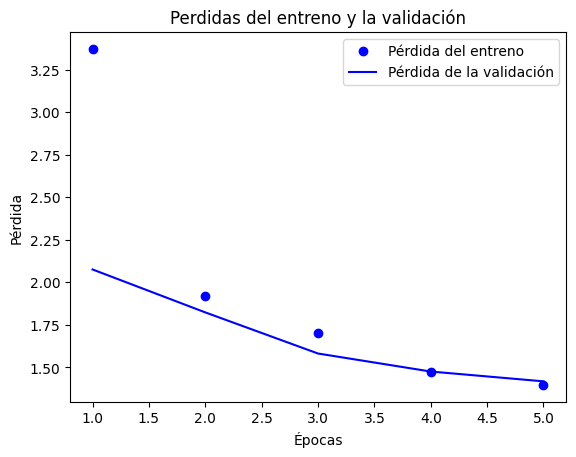

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

Tras haber implementado los modelos 3 y 3.2, podemos concluir que el optimizador Adam no mejora el rendimiento en redes neuronales de clasificación multiclase en comparación con optimizadores como SGD y RMSprop. Esto se debe a que Adam trabaja con datos sin normalizar, lo que complica el entrenamiento en tan pocas épocas, ya que se pasa de valores de entrada que pueden estar entre 0 y 255 a valores de salida entre 0 y 1.

Al analizar las gráficas de error, observamos que en el caso del modelo 3.2, el error desciende muy lentamente, casi de manera lineal, mientras que en el modelo 3, el error disminuye de forma más abrupta.



## Caso 4

Volvemos a importar los datos y a normalizarlos y convertirlos en vectores ya que vamos a volver a utilizar la función de pérdida categorical_crossentropy

In [48]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [49]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [50]:
network4 = models.Sequential()
network4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network4.add(layers.Dense(10, activation='softmax'))
network4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                7850      
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


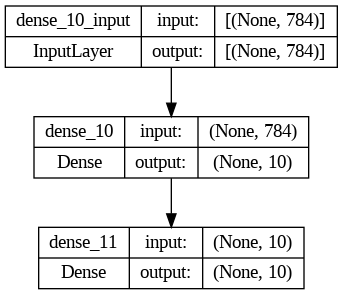

In [51]:
keras.utils.plot_model(network4, "my_first_model.png", show_shapes=True)

In [52]:
network4.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [53]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [54]:
history = network4.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
391/391 [==============================] - 3s 5ms/step - loss: 1.4829 - accuracy: 0.6288 - val_loss: 1.1146 - val_accuracy: 0.7409
Epoch 2/5
391/391 [==============================] - 1s 3ms/step - loss: 0.9257 - accuracy: 0.7664 - val_loss: 0.7926 - val_accuracy: 0.7797
Epoch 3/5
391/391 [==============================] - 2s 4ms/step - loss: 0.6962 - accuracy: 0.8018 - val_loss: 0.6370 - val_accuracy: 0.8084
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 0.5844 - accuracy: 0.8222 - val_loss: 0.5607 - val_accuracy: 0.8226
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 0.5244 - accuracy: 0.8322 - val_loss: 0.5205 - val_accuracy: 0.8278


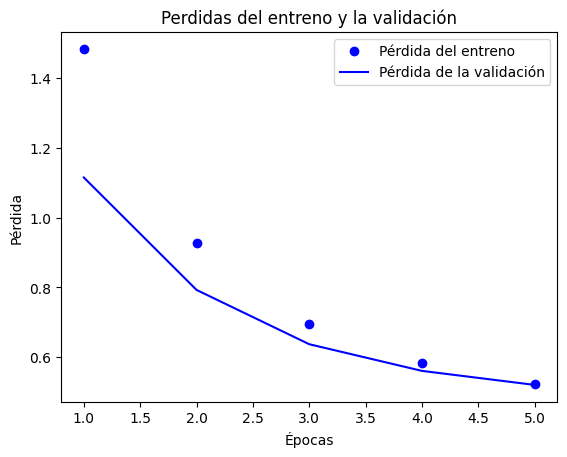

In [55]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

## Caso 5

Los modelos creados a continuación se diferencian de los modelos creados anteriormente en la primera capa, ya que en este caso será una primera capa que estará formada por 512 neuronas.

In [56]:
network5 = models.Sequential()
network5.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network5.add(layers.Dense(10, activation='softmax'))
network5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


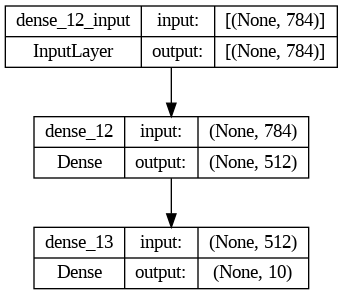

In [57]:
keras.utils.plot_model(network5, "my_first_model.png", show_shapes=True)

In [58]:
network5.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [59]:
history = network5.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
391/391 [==============================] - 6s 15ms/step - loss: 1.0629 - accuracy: 0.6854 - val_loss: 0.7502 - val_accuracy: 0.7634
Epoch 2/5
391/391 [==============================] - 4s 10ms/step - loss: 0.6804 - accuracy: 0.7851 - val_loss: 0.6333 - val_accuracy: 0.7949
Epoch 3/5
391/391 [==============================] - 4s 11ms/step - loss: 0.6004 - accuracy: 0.8068 - val_loss: 0.5809 - val_accuracy: 0.8096
Epoch 4/5
391/391 [==============================] - 6s 15ms/step - loss: 0.5572 - accuracy: 0.8180 - val_loss: 0.5461 - val_accuracy: 0.8190
Epoch 5/5
391/391 [==============================] - 4s 11ms/step - loss: 0.5294 - accuracy: 0.8250 - val_loss: 0.5199 - val_accuracy: 0.8292


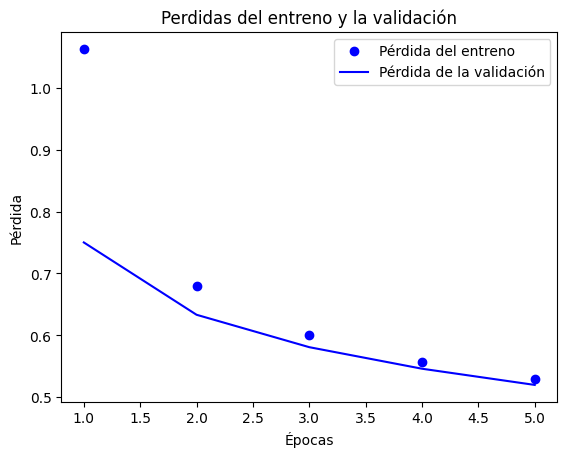

In [60]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

## Caso 6

In [61]:
network6 = models.Sequential()
network6.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network6.add(layers.Dense(10, activation='softmax'))
network6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


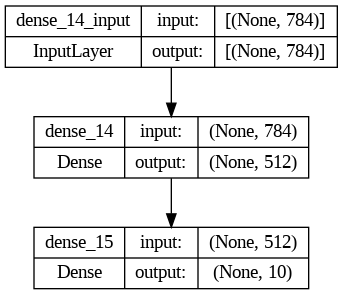

In [62]:
keras.utils.plot_model(network6, "my_first_model.png", show_shapes=True)

In [63]:
network6.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [64]:
history = network6.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
391/391 [==============================] - 6s 15ms/step - loss: 0.5854 - accuracy: 0.7937 - val_loss: 0.5209 - val_accuracy: 0.8088
Epoch 2/5
391/391 [==============================] - 6s 16ms/step - loss: 0.4027 - accuracy: 0.8533 - val_loss: 0.4101 - val_accuracy: 0.8520
Epoch 3/5
391/391 [==============================] - 5s 14ms/step - loss: 0.3538 - accuracy: 0.8693 - val_loss: 0.4370 - val_accuracy: 0.8449
Epoch 4/5
391/391 [==============================] - 7s 17ms/step - loss: 0.3246 - accuracy: 0.8786 - val_loss: 0.3214 - val_accuracy: 0.8835
Epoch 5/5
391/391 [==============================] - 4s 11ms/step - loss: 0.3020 - accuracy: 0.8879 - val_loss: 0.3194 - val_accuracy: 0.8872


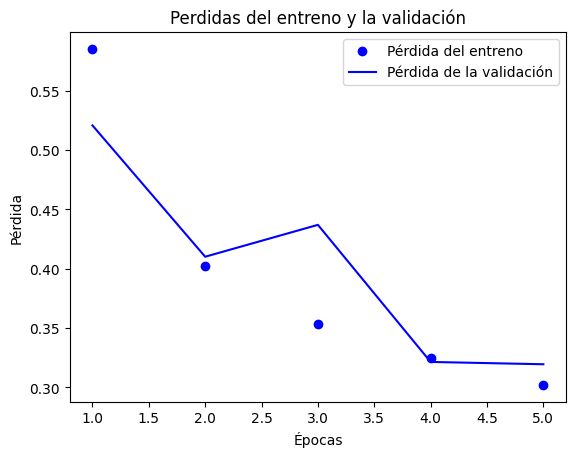

In [65]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

## Caso 7

In [66]:
network7 = models.Sequential()
network7.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network7.add(layers.Dense(10, activation='softmax'))
network7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


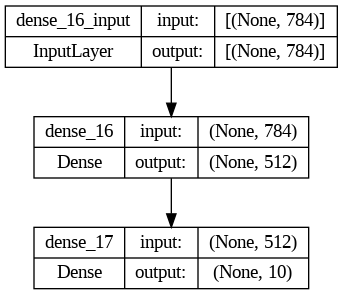

In [67]:
keras.utils.plot_model(network7, "my_first_model.png", show_shapes=True)

In [68]:
network7.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [69]:
history = network7.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
391/391 [==============================] - 4s 10ms/step - loss: 1.7844 - accuracy: 0.5617 - val_loss: 1.3967 - val_accuracy: 0.6968
Epoch 2/5
391/391 [==============================] - 5s 13ms/step - loss: 1.2129 - accuracy: 0.7053 - val_loss: 1.0685 - val_accuracy: 0.7160
Epoch 3/5
391/391 [==============================] - 4s 9ms/step - loss: 0.9878 - accuracy: 0.7249 - val_loss: 0.9195 - val_accuracy: 0.7245
Epoch 4/5
391/391 [==============================] - 4s 10ms/step - loss: 0.8730 - accuracy: 0.7366 - val_loss: 0.8311 - val_accuracy: 0.7421
Epoch 5/5
391/391 [==============================] - 5s 13ms/step - loss: 0.8035 - accuracy: 0.7450 - val_loss: 0.7771 - val_accuracy: 0.7472


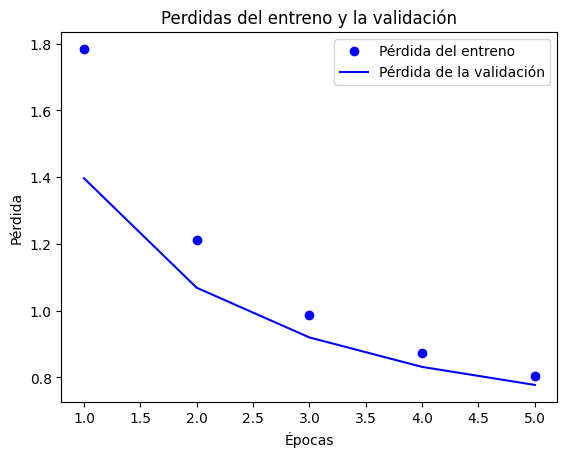

In [70]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

##Caso 7.2

En este caso al igual que en el 2.2 aumentaremos el número de épocas a la hora de entrenar la red para hacer una comparativa con el modelo original.

In [71]:
network72 = models.Sequential()
network72.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network72.add(layers.Dense(10, activation='softmax'))
network72.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


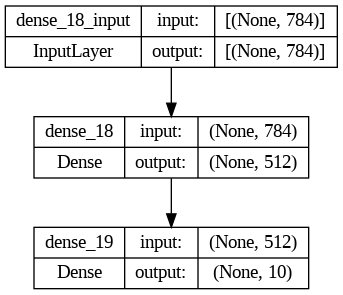

In [72]:
keras.utils.plot_model(network72, "my_first_model.png", show_shapes=True)

In [73]:
network72.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [74]:
history = network72.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/25
391/391 [==============================] - 4s 10ms/step - loss: 1.7649 - accuracy: 0.5678 - val_loss: 1.3969 - val_accuracy: 0.6815
Epoch 2/25
391/391 [==============================] - 4s 10ms/step - loss: 1.2186 - accuracy: 0.7039 - val_loss: 1.0797 - val_accuracy: 0.7123
Epoch 3/25
391/391 [==============================] - 5s 14ms/step - loss: 0.9950 - accuracy: 0.7250 - val_loss: 0.9243 - val_accuracy: 0.7327
Epoch 4/25
391/391 [==============================] - 4s 10ms/step - loss: 0.8782 - accuracy: 0.7365 - val_loss: 0.8360 - val_accuracy: 0.7418
Epoch 5/25
391/391 [==============================] - 4s 9ms/step - loss: 0.8068 - accuracy: 0.7459 - val_loss: 0.7811 - val_accuracy: 0.7488
Epoch 6/25
391/391 [==============================] - 4s 11ms/step - loss: 0.7584 - accuracy: 0.7532 - val_loss: 0.7386 - val_accuracy: 0.7588
Epoch 7/25
391/391 [==============================] - 5s 13ms/step - loss: 0.7232 - accuracy: 0.7603 - val_loss: 0.7086 - val_accuracy: 0.7659


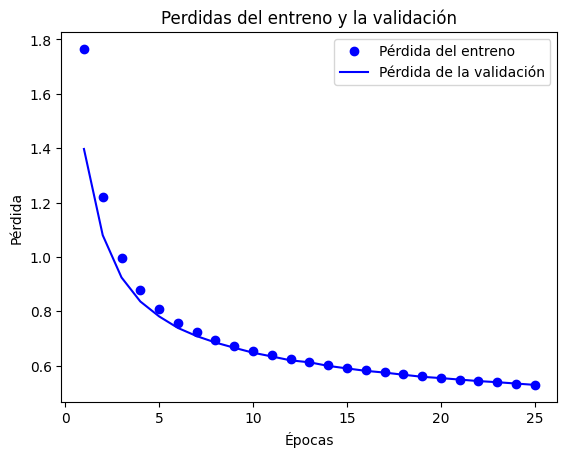

In [75]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

###Comparación modelos 7 y 7.2
Estos dos modelos tienen una única diferencia y es el número de épocas que se han utilizado para entrenar el modelo, en este caso, a diferencia de la comparación de los modelos 2 y 2.2, podemos decir que entrenando el mismo modelo pero 5 veces más no se produce sobre entrenamiento sino que el modelo en la época 25 sigue mejorando al igual que la precisión.
Por tanto podemos decir, que en el caso del modelo 7 es mejor entrenar el modelo con 25 épocas para mejorar la precisión del modelo.

## Caso 8

In [76]:
network8 = models.Sequential()
network8.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network8.add(layers.Dense(10, activation='softmax'))
network8.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dense_21 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


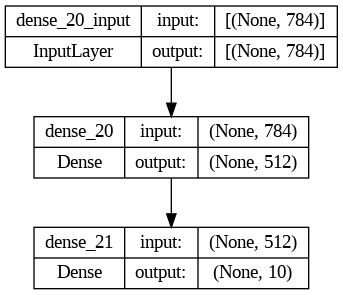

In [77]:
keras.utils.plot_model(network8, "my_first_model.png", show_shapes=True)

In [78]:
network8.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [79]:
history = network8.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
391/391 [==============================] - 7s 18ms/step - loss: 0.6424 - accuracy: 0.7747 - val_loss: 0.4876 - val_accuracy: 0.8286
Epoch 2/5
391/391 [==============================] - 5s 13ms/step - loss: 0.4613 - accuracy: 0.8325 - val_loss: 0.4575 - val_accuracy: 0.8350
Epoch 3/5
391/391 [==============================] - 7s 17ms/step - loss: 0.4227 - accuracy: 0.8468 - val_loss: 0.4160 - val_accuracy: 0.8523
Epoch 4/5
391/391 [==============================] - 5s 13ms/step - loss: 0.3979 - accuracy: 0.8546 - val_loss: 0.4437 - val_accuracy: 0.8383
Epoch 5/5
391/391 [==============================] - 6s 15ms/step - loss: 0.3785 - accuracy: 0.8624 - val_loss: 0.3808 - val_accuracy: 0.8621


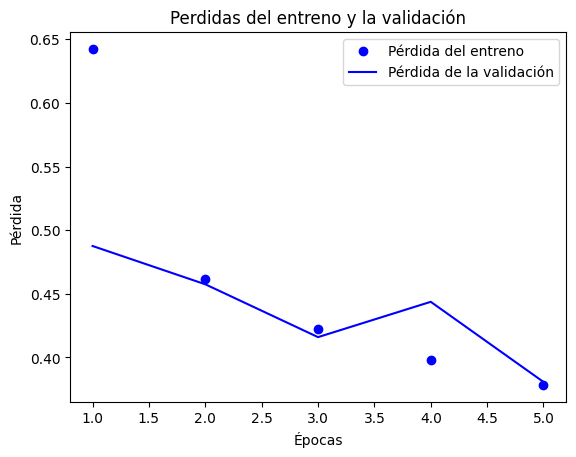

In [80]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

##Resultados obtenidos con la función model.summary

Tras haber implementado los 8 modelos de red neuronal, observamos que todos ellos, al utilizar la función **.summary**, están representados por dos capas:

En los primeros 4 casos, la capa 1 tiene 10 neuronas, por lo que el número de parámetros modificables en esta capa es de 7850. Esto se debe a que se multiplica la dimensión del vector de entrada (784) por el número de neuronas en la capa (10), más los 10 umbrales de cada neurona.

En los casos 5 a 8, la capa 1 tiene 512 neuronas, lo que resulta en 401,920 parámetros modificables. Este número se obtiene multiplicando la dimensión del vector de entrada (784) por el número de neuronas en la capa (512), más los 512 umbrales de cada neurona.

En cuanto a la segunda capa, para los modelos 1 a 4, esta tiene 10 neuronas, resultando en 110 parámetros modificables. Esto se calcula multiplicando el número de neuronas de la capa anterior (10) por el número de neuronas de la capa actual (10), más los 10 umbrales de cada neurona.

Para los modelos 5 a 8, la segunda capa también tiene 10 neuronas, pero el número de parámetros modificables es de 5130. Esto se obtiene multiplicando el número de neuronas de la capa anterior (512) por el número de neuronas de la capa actual (10), más los 10 umbrales de cada neurona.

En resumen, el número total de parámetros modificables en los modelos 1 a 4 es de 7960, mientras que en los modelos 5 a 8 es de 407,050.

##Comparación predicción resultados imagen test 6

Tras haber realizado todos los modelos que se necesitan, vamos a proceder a estudiar las predicciones que realizan cada uno de nuestros 8 modelos, con el fin de saber como de buenos son cada uno de nuestros modelos.

In [81]:
predictions = network.predict(test_images)
predictions2 = network2.predict(test_images)
predictions3 = network3.predict(test_images)
predictions4 = network4.predict(test_images)
predictions5 = network5.predict(test_images)
predictions6 = network6.predict(test_images)
predictions7 = network7.predict(test_images)
predictions8 = network8.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [82]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Vamos a tomar la imagen de test 6 con el fin de ver como predice cada uno de nuestros modelos la imagen, para ello crearemos un gráfico de barras en el cuál se represente el vector de datos de salida que se obtiene tras introducir la imagen en cada una de las redes.

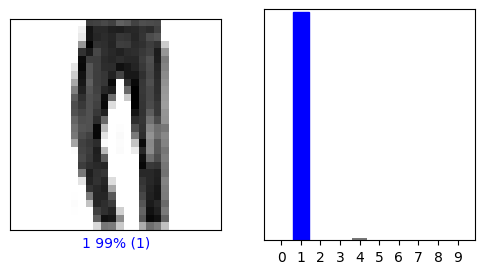

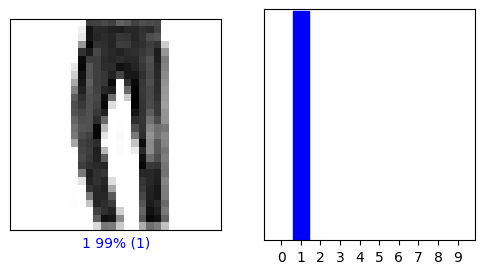

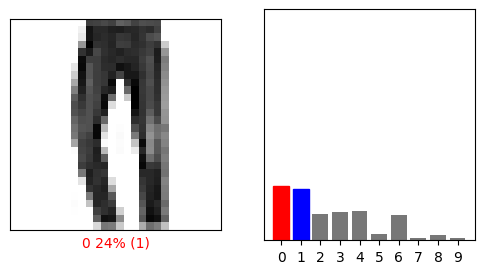

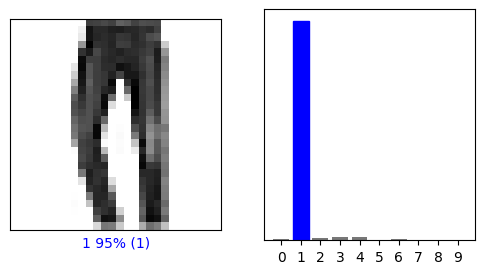

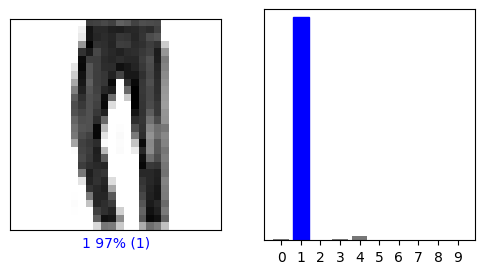

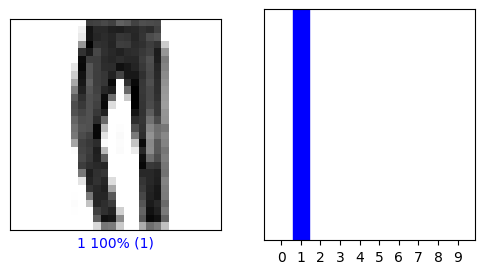

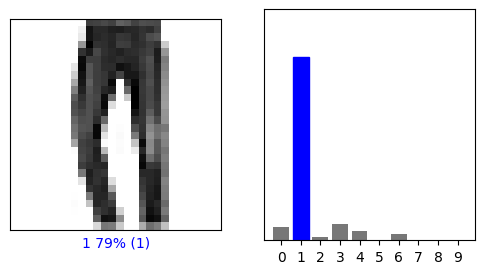

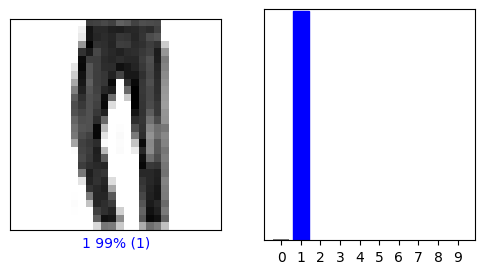

In [83]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions2[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions2[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions3[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions3[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions4[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions4[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions5[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions5[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions6[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions6[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions7[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions7[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions8[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions8[5], test_labels)
plt.show()

Al observar las predicciones realizadas por todos los modelos para la imagen número 6, vemos que todos predicen que esa imagen corresponde a la etiqueta 1, que representa pantalones.

A pesar de que todos los modelos realizan la predicción correcta, no lo hacen con la misma certeza. Los modelos 1, 2, 4, 5, 6 y 8 tienen un valor en la posición 1 del vector de salida superior a 0.95, lo que indica un porcentaje muy alto de certeza de que esa imagen sea un pantalón. Por otro lado, los modelos 3 y 7 tienen un valor relativamente bajo, inferior a 0.9, para la predicción de que esa imagen sea un pantalón.

Por lo tanto, para esta imagen en particular, podemos concluir que los modelos 3 y 7 no son muy precisos, y especialmente el modelo 3 destaca por su baja precisión.

#Conclusiones finales

Para poder realizar un ánalisis mejor de cada uno de los modelos y conocer para que clases los modelos son mejores y para que imagenes fallan más, vamos a realizar la matriz de confusión de cada uno de los 8 modelos.

In [84]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 1============================


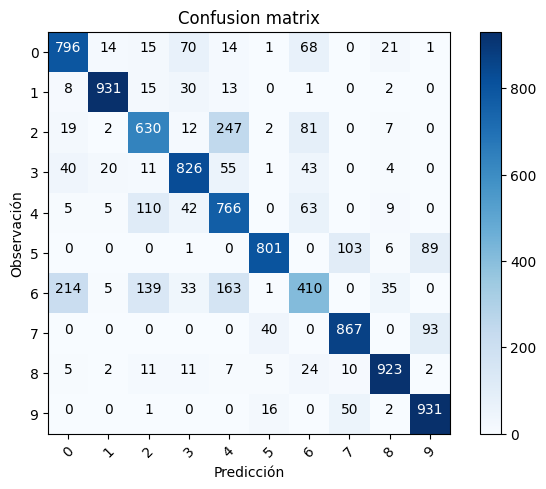

In [85]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
# Convertir en predicciones de clases desde los vectores one-hot encoding
Y_pred_classes = np.argmax(predictions, axis = 1)
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(one_hot_test_labels, axis = 1)
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 1============================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 2============================


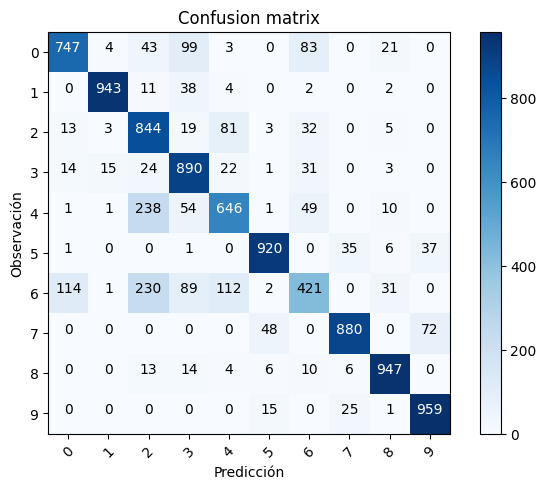

In [86]:
Y_pred_classes2 = np.argmax(predictions2, axis = 1)
Y_true2 = np.argmax(one_hot_test_labels, axis = 1)
confusion_mtx2 = confusion_matrix(Y_true2, Y_pred_classes2)
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 2============================")
plot_confusion_matrix(confusion_mtx2, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 3============================


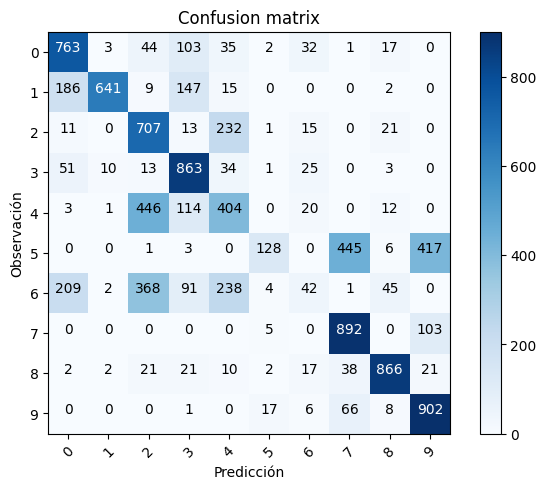

In [87]:
Y_pred_classes3 = np.argmax(predictions3, axis = 1)
Y_true3 = np.argmax(one_hot_test_labels, axis = 1)
confusion_mtx3 = confusion_matrix(Y_true3, Y_pred_classes3)
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 3============================")
plot_confusion_matrix(confusion_mtx3, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 4============================


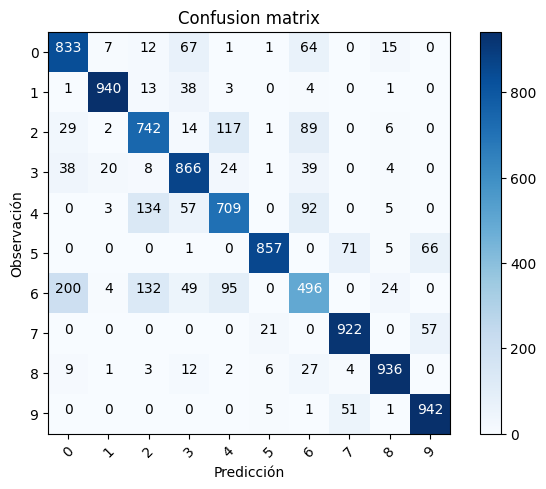

In [88]:
Y_pred_classes4 = np.argmax(predictions4, axis = 1)
Y_true4 = np.argmax(one_hot_test_labels, axis = 1)
confusion_mtx4 = confusion_matrix(Y_true4, Y_pred_classes4)
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 4============================")
plot_confusion_matrix(confusion_mtx4, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 5============================


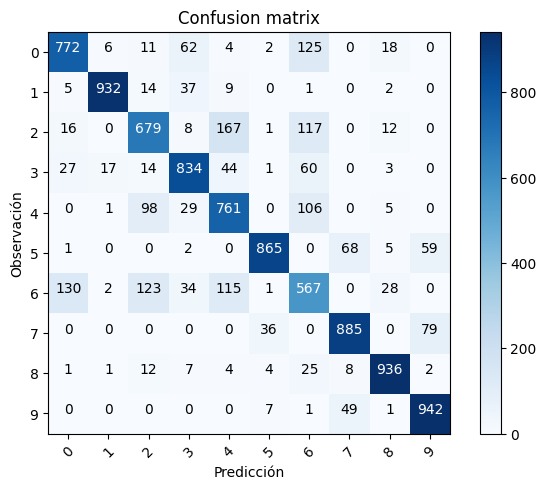

In [89]:
Y_pred_classes5 = np.argmax(predictions5, axis = 1)
Y_true5 = np.argmax(one_hot_test_labels, axis = 1)
confusion_mtx5 = confusion_matrix(Y_true5, Y_pred_classes5)
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 5============================")
plot_confusion_matrix(confusion_mtx5, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 6============================


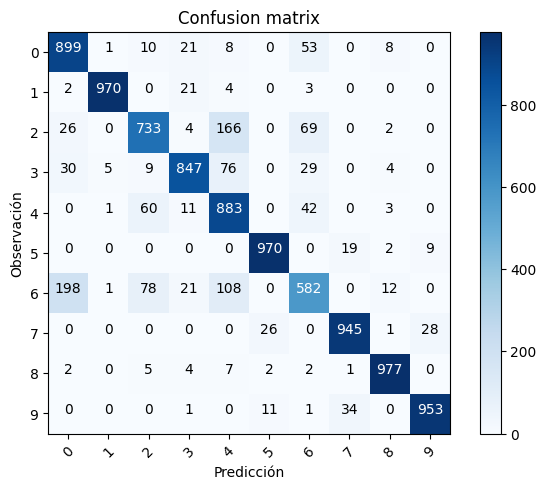

In [90]:
Y_pred_classes6 = np.argmax(predictions6, axis = 1)
Y_true6 = np.argmax(one_hot_test_labels, axis = 1)
confusion_mtx6 = confusion_matrix(Y_true6, Y_pred_classes6)
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 6============================")
plot_confusion_matrix(confusion_mtx6, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 7============================


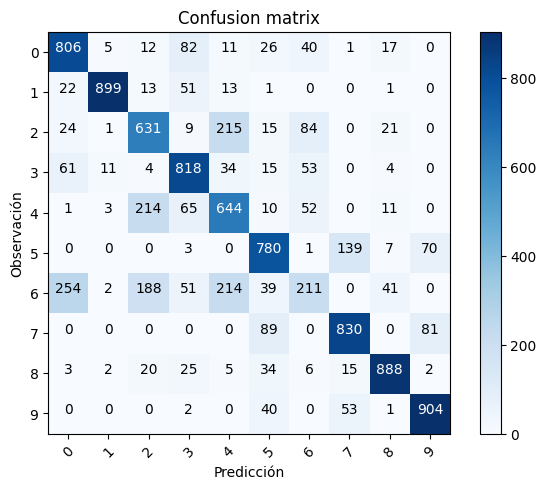

In [91]:
Y_pred_classes7 = np.argmax(predictions7, axis = 1)
Y_true7 = np.argmax(one_hot_test_labels, axis = 1)
confusion_mtx7 = confusion_matrix(Y_true7, Y_pred_classes7)
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 7============================")
plot_confusion_matrix(confusion_mtx7, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 8============================


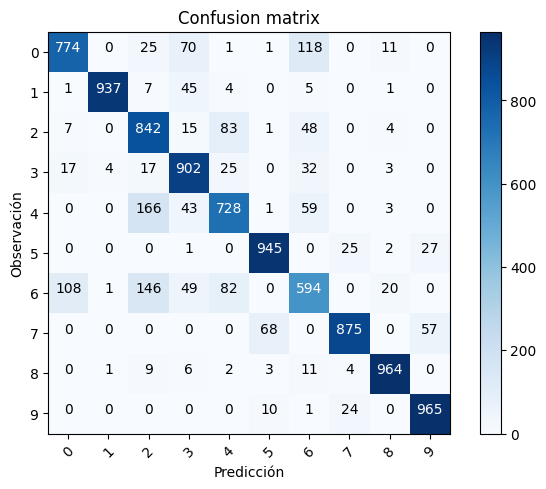

In [92]:
Y_pred_classes8 = np.argmax(predictions8, axis = 1)
Y_true8 = np.argmax(one_hot_test_labels, axis = 1)
confusion_mtx8 = confusion_matrix(Y_true8, Y_pred_classes8)
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 8============================")
plot_confusion_matrix(confusion_mtx8, classes = range(10))

Después de entrenar y realizar predicciones con los modelos para los 8 casos, podemos extraer las siguientes conclusiones:

Los modelos fueron entrenados con un número bajo de épocas (5), lo que dificulta determinar si es el número óptimo de épocas o si existe un número mejor, o si se produce sobreentrenamiento. Observamos que en los casos donde la primera capa tiene 512 neuronas, la pérdida es menor que en aquellos con la misma configuración pero con 10 neuronas en la primera capa.

Al analizar los gráficos de predicción respecto a la imagen 6 del conjunto de prueba, notamos que los modelos 3 y 7 son los peores en la predicción de esta imagen, lo que se confirma al revisar los valores de pérdida y precisión obtenidos durante el entrenamiento.

Estos modelos (3 y 7) comparten el optimizador 'sgd' y la función de activación 'sigmoid' en su primera capa. Por lo tanto, podemos concluir que esta combinación de hiperparámetros no es adecuada para redes neuronales de clasificación multiclase.

En contraste, los modelos con mejor precisión y menor pérdida son los modelos 2 y 6, que tienen en común el optimizador 'rmsprop' y la función de activación 'relu' en su primera capa. Esto sugiere que esta combinación de hiperparámetros es efectiva para este tipo de redes neuronales.

Además, observamos que los modelos con 512 neuronas en la primera capa tienden a tener una mayor precisión y menor error.

Al examinar las matrices de confusión, notamos que en todos los casos, los modelos tienen dificultades para predecir las etiquetas 2, 4 y 6 (correspondientes a jerseys, abrigos y camisas), lo cual puede ser atribuido a la similitud en la forma de estos elementos.

En resumen, los modelos en su conjunto no tienen un desempeño óptimo, ya que cometen muchos errores en la predicción.